## The Fun Side

Sage is training and I don't feel like reading or writing. Making a 1D cellular automata with the famous "Rule 30" to look at pretty plots of complex emergent behaviour.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def apply_rule(rule, state, pos):
    left = state[pos - 1]
    center = state[pos]
    right = state[(pos + 1) % len(state)]
    return rule[left * 4 + center * 2 + right]

def evolve(rule, initial_state, steps):
    state = initial_state.copy()
    history = [state.copy()]
    
    for _ in range(steps):
        new_state = np.zeros_like(state)
        for i in range(len(state)):
            new_state[i] = apply_rule(rule, state, i)
        state = new_state
        history.append(state.copy())
    
    return history

def plot_evolution(history):
    plt.figure(figsize=(10, 5))
    plt.imshow(history, cmap="binary", interpolation="nearest")
    plt.xlabel("Time Step")
    plt.ylabel("Cell")
    plt.title("Rule 30 Cellular Automaton Evolution")
    plt.show()

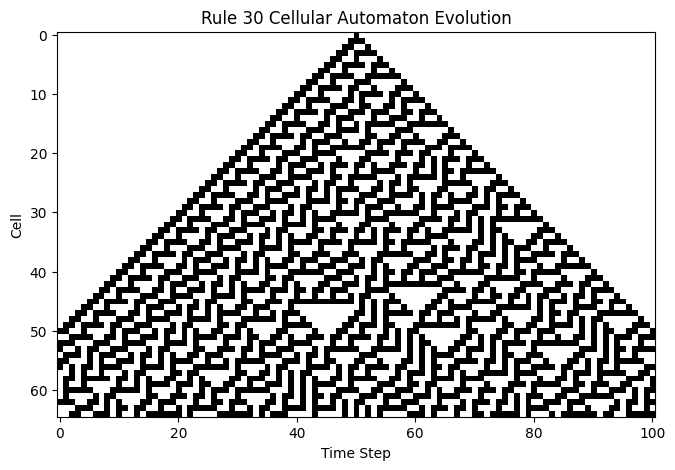

In [4]:
# Define Rule 30
rule30 = np.array([0, 1, 1, 1, 1, 0, 0, 0], dtype=int)
# Set initial state
initial_state = np.zeros(101, dtype=int)
initial_state[50] = 1

# Evolve and plot
steps = 64
evolution_history = evolve(rule30, initial_state, steps)
plot_evolution(np.array(evolution_history))

In [5]:
# Define Rule 30
rule30 = np.array([0, 1, 1, 1, 1, 0, 0, 0], dtype=int)
# Set initial state
initial_state = np.zeros(10001, dtype=int)
initial_state[50] = 1

# Evolve and plot
steps = 10000
evolution_history = evolve(rule30, initial_state, steps)
plot_evolution(np.array(evolution_history))

KeyboardInterrupt: 

### Conway's Game of Life

In [19]:
! pip install cellpylib

  Preparing metadata (setup.py) ... done
  Created wheel for cellpylib: filename=cellpylib-2.4.0-py3-none-any.whl size=37923 sha256=12e543e52e495c5036f3a39e3f756ba8dd4a2efce9ab0690323d18caaa7e5ff6
  Stored in directory: /home/nnarenraju/.cache/pip/wheels/8d/99/7b/e22e3050aac196673184a559b605f04c264f8b672f1c028208
Successfully built cellpylib

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
import cellpylib as cpl
from matplotlib.animation import FuncAnimation

# Glider
cellular_automaton = cpl.init_simple2d(60, 60)
cellular_automaton[:, [28,29,30,30], [30,31,29,31]] = 1

# Blinker
cellular_automaton[:, [40,40,40], [15,16,17]] = 1

# Light Weight Space Ship (LWSS)
cellular_automaton[:, [18,18,19,20,21,21,21,21,20], [45,48,44,44,44,45,46,47,48]] = 1

In [7]:
# evolve the cellular automaton for 60 time steps
timesteps = 256
cellular_automaton = cpl.evolve2d(cellular_automaton, timesteps=timesteps, neighbourhood='Moore',
                                  apply_rule=cpl.game_of_life_rule, memoize='recursive')
print(cellular_automaton.shape)

(256, 60, 60)


MovieWriter ffmpeg unavailable; using Pillow instead.


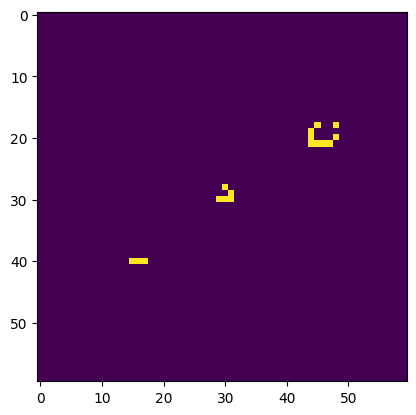

In [8]:
# Set up plotting
fig = plt.figure()
ax = plt.axes()  

# Animation function
def animate(i):
    img = plt.imshow(cellular_automaton[i])
    return img

animation = FuncAnimation(fig,
                          func = animate,
                          frames = np.arange(0, timesteps, 1), 
                          interval = 1)

animation.save("./conways_game_of_life.gif")